# Índice (tentativo)

- [Introducción](#Introducción)
    - [Objetivos del cuaderno](#Objetivos-del-cuaderno)
    - [Motivación y marco teórico](#Motivación-y-Marco-Teórico)
        - [Dificultad clásica para resolver el problema de búsqueda de período]()
        - [HSP: Problema del subgrupo oculto]()
        - [Búsqueda de Período como instancia del HSP]()
        - [Preguntas exploratorias para la implementación del algoritmo de búsqueda de período]()
- [Diseño de Implementación]()

      


# Introducción

## Objetivos del cuaderno
 - Motivar el desarrollo de la implementación del algoritmo para la solución del problema de búsqueda de período.
 - Entender el problema que resuelve el algoritmo de búsqueda de período cuántico. Cuáles son sus componentes y sus marco teórico.
 - Presentar preguntas exploratorias 

## Motivación y Marco Teórico

La búsqueda del período $r$ de una función periódica $f$ consiste en encontrar el menor entero positivo $r$ tal que:

$$
f(x) = f(x + r) \quad \text{para todo } x \text{ en el dominio.}
$$

Generalmente, consideramos funciones definidas sobre un dominio grande, por ejemplo, un subconjunto de los enteros o números modulares, y con un codominio también amplio.


### ¿Por qué es difícil encontrar el período clásicamente?



Desde un punto de vista clásico, no existe un algoritmo eficiente conocido para encontrar $r$ sin evaluar la función en muchos puntos. Una estrategia natural es:

- Evaluar $f$ en distintos valores $x_1, x_2, \dots, x_n$.
- Buscar colisiones, es decir, pares $(x_i, x_j)$ con $i \neq j$ tales que:
$$f(x_i) = f(x_j)$$

Estas colisiones pueden indicar que la diferencia $|x_i - x_j|$ es un múltiplo del período $r$, lo que ayuda a deducir $r$.

**Número de comparaciones y probabilidad de colisión**

Con $n$ evaluaciones, el número de pares que podemos comparar es:

$$
\binom{n}{2} = \frac{n(n-1)}{2}.
$$

Si suponemos que $f$ toma valores en un conjunto de tamaño $r$ (por ejemplo, $\{0,1,\dots,r-1\}$), la probabilidad de que dos valores evaluados coincidan (colisión) aumenta con $n$.

Este fenómeno es análogo a la *paradoja del cumpleaños*: para que la probabilidad de encontrar al menos una colisión sea significativa (digamos, alrededor del 50%), se necesita aproximadamente:

$$
n \approx 1.2 \sqrt{r}
$$

evaluaciones.

**Complejidad temporal clásica**

En problemas relevantes, como aquellos relacionados con funciones definidas sobre entradas de $n$ bits, el período puede ser tan grande como $2^n$. Esto implica que la búsqueda clásica del período, basada en encontrar colisiones, requiere un número de evaluaciones y comparaciones del orden de:

$$
\mathcal{O}(\sqrt{2^n}) = \mathcal{O}(2^{n/2}),
$$

es decir, tiempo exponencial en $n$.

Esta dificultad es la base para la seguridad de ciertos sistemas criptográficos y motiva la búsqueda de algoritmos más eficientes, como los algoritmos cuánticos.



### Marco Teórico: Problema del Subgrupo Oculto (HSP)

El problema del subgrupo oculto (HSP, por sus siglas en inglés, *Hidden Subgroup Problem*) es un **marco matemático general** que subyace a varios de los algoritmos cuánticos más importantes que demuestran una **ventaja de velocidad exponencial** sobre los mejores algoritmos clásicos conocidos.

#### Fundamentos de Teoría de Grupos para Entender el HSP

Para comprender el **Problema del Subgrupo Oculto (HSP)**, necesitamos familiarizarnos con los siguientes conceptos clave de teoría de grupos:

---
- Grupo $(G, \cdot)$
Un **grupo** es un conjunto $G$ junto con una operación binaria $\cdot$ (como suma o multiplicación), que satisface cuatro propiedades:

1. **Clausura**: $\forall a, b \in G$, se tiene $a \cdot b \in G$.
2. **Asociatividad**: $(a \cdot b) \cdot c = a \cdot (b \cdot c)$.
3. **Elemento neutro**: Existe $e \in G$ tal que $a \cdot e = a$ para todo $a \in G$.
4. **Inversos**: Para cada $a \in G$, existe $a^{-1} \in G$ tal que $a \cdot a^{-1} = e$.

Además, se dice **abeliano** si la operación binaria que define la estructura del grupo es **conmutativa**. En otras palabras, el orden en que se realizan las operaciones con dos elementos no afecta el resultado. 

📌 **Ejemplo**: $(\mathbb{Z}, +)$ es un grupo, donde la operación es la suma. Además es abeliano.

- Subgrupo $K \leq G$
Un **subgrupo** $K$ es un subconjunto de $G$ que forma un grupo bajo la misma operación de $G$.

📌 **Ejemplo**: $2\mathbb{Z} \subseteq \mathbb{Z}$ es un subgrupo de los enteros: suma de pares sigue siendo par, el neutro es $0$, y cada número par tiene inverso aditivo.

- Cosets (Clases laterales)
Dado un subgrupo $K \leq G$ y un elemento $g \in G$, se define la **clase lateral izquierda** como:

$$
gK := \{g \cdot k : k \in K\}
$$

Estas clases particionan el grupo $G$, es decir, **cada elemento de $G$ pertenece a una única clase lateral**.  

📌 **Ejemplo**: En $G = \mathbb{Z}$ y $K = 3\mathbb{Z}$, las clases laterales son:
- $0 + 3\mathbb{Z} = \{\dots, -6, -3, 0, 3, 6, \dots\}$
- $1 + 3\mathbb{Z} = \{\dots, -5, -2, 1, 4, 7, \dots\}$
- $2 + 3\mathbb{Z} = \{\dots, -4, -1, 2, 5, 8, \dots\}$

- Función constante en clases laterales
Una función $f: G \to X$ es **constante en las clases laterales de $K$** si:

$$
f(g_1) = f(g_2) \quad \text{si y sólo si} \quad g_1K = g_2K
$$

📌 Es decir, **$f$ asigna el mismo valor a todos los elementos de una misma clase lateral, y valores distintos entre diferentes clases**.

En el **Problema del Subgrupo Oculto**, **no conocemos el subgrupo $K$**, pero sabemos que **la función $f$ está estructurada de forma que refleja las clases laterales de $K$**.

---

#### Definición del Problema del Subgrupo Oculto (HSP)

El problema del subgrupo oculto se define formalmente como sigue:

> Dada una **función $f$ de un grupo $G$ generado finitamente a un conjunto finito $X$**, con la propiedad de que **$f$ es constante en las cosets de un subgrupo $K$ y distinta en cada coset**. Es decir,  
> 
> $$f(g_1) = f(g_2) \quad \Leftrightarrow \quad g_1 K = g_2 K.$$
> 
> 
> Se tiene acceso a una "caja negra cuántica" que realiza la transformación unitaria  
> 
> $$U_f |g⟩|h⟩ = |g⟩|h \oplus f(g)⟩,$$
> 
> donde $g \in G$, $h \in X$, y $\oplus$ es una operación binaria en $X$.  
> 
> El objetivo es encontrar un conjunto generador del subgrupo oculto $K$.

Ejemplos notables de problemas que son instancias del HSP:
- Factorización de números enteros (algoritmo de Shor)
- Logaritmo discreto
- Búsqueda de órdenes
- Búsqueda de períodos
- Algoritmo de Deutsch-Jozsa
- Problema de Simon

---

#### Ventaja Exponencial para Grupos Abelianos Finitos

Los algoritmos cuánticos que resuelven el HSP para **grupos abelianos finitos** exhiben una clara **ventaja exponencial** en eficiencia computacional gracias a la implementación eficiente de la **Transformada de Fourier Cuántica (QFT)**:

- Para $G$ abeliano y finito, la QFT se puede realizar en **tiempo polinomial en $\log |G|$**.
- Por ejemplo, el algoritmo de Shor para factorización (una instancia del HSP sobre $\mathbb{Z}_N$) tiene complejidad cuántica de  
  $$
  O(n^2 \log n \log \log n),
  $$
  mientras que el mejor algoritmo clásico conocido (el *number field sieve*) tiene complejidad  
  $$
  \exp(\Theta(n^{1/3} \log^{2/3} n)).
  $$
- Esto representa una **aceleración exponencial real**.

---

#### El *Promise Problem*

El HSP es un **problema con promesa** (*promise problem*). Es decir, se **supone garantizado** que la función de entrada $f$ cumple la propiedad de ser constante en las clases laterales de un subgrupo $K$.

- Esta estructura es explotada por el algoritmo cuántico para obtener una solución eficiente.
- Sin esta promesa (es decir, si $f$ es arbitraria), **no se puede garantizar una ventaja cuántica exponencial**.

Esto ilustra que las **ventajas cuánticas no son universales**, sino que aparecen en problemas con estructuras algebraicas aprovechables.

---

#### Principios de Mecánica Cuántica Aprovechados

Los algoritmos para el HSP se basan principalmente en dos principios de la mecánica cuántica:

1. Superposición (*Paralelismo Cuántico*)
- Un estado como  
  $$
  |0⟩^{\otimes n}|0⟩ \xrightarrow{\text{Hadamard}} \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} |x⟩|0⟩
  $$
  permite evaluar $f(x)$ **simultáneamente** para todos los $x$ aplicando la caja negra (oráculo):
  $$
  \frac{1}{\sqrt{2^n}} \sum_{x} |x⟩|f(x)⟩.
  $$

2. Interferencia
- Después de aplicar $U_f$, la información relevante sobre $K$ no está directamente observable.
- Se aplica la **Transformada de Fourier Cuántica (QFT)** sobre el primer registro.
- La QFT permite que ciertas amplitudes se **interfieran constructiva o destructivamente**, revelando la estructura del subgrupo oculto.

---

#### Esquema General del Algoritmo Cuántico para el HSP

1. Preparación del estado inicial
- Dos registros:
  - El primero se pone en superposición uniforme:  
    $$
    \frac{1}{\sqrt{|G|}} \sum_{g \in G} |g⟩
    $$
  - El segundo se inicializa como $|0⟩$ o en una superposición conveniente.

2. Aplicación de la caja negra
- Se aplica $U_f$:
  $$
  \frac{1}{\sqrt{|G|}} \sum_{g \in G} |g⟩|f(g)⟩.
  $$

3. Aplicación de la QFT
- Se aplica la **QFT inversa** al primer registro.
- Esto transforma la información de periodicidad en **picos de amplitud** que codifican información sobre $K$.

4. Medición
- Se mide el primer registro.
- El resultado está relacionado con el **espacio dual** del grupo, ortogonal a $K$.

5. Post-procesamiento clásico
- A partir de múltiples mediciones, se aplica un algoritmo clásico (como el de **fracciones continuas**) para **reconstruir los generadores del subgrupo $K$**.


### Búsqueda de período

El problema de búsqueda de período es un caso especial del HSP. En este contexto, la búsqueda de período se puede ver como la identificación de un subgrupo oculto en un grupo abeliano finito.

El problema se define de la siguiente manera: 

> Suponga que tiene una función $f$ que produce una **salida de un solo bit** y es **periódica**, de tal forma que $f(x + r) = f(x)$ para un período desconocido $r$ (donde $0 < r < N=2^L$).
> Se le proporciona una "caja negra cuántica" (u oráculo) $U_f$ que realiza la transformación unitaria $U_f|x⟩|y⟩ → |x⟩|y \oplus f(x)⟩$ (donde $\oplus$ denota la suma módulo 2). El objetivo es determinar el valor de $r$.

Esta descripción encaja dentro del marco del HSP si se eligen:

- $G= \mathbb{Z}_N$ como grupo abeliano finito,

- $K= \langle r \rangle$ como subgrupo generado por el período $r$,

- $f$ constante en cosets $x+K$, y distinta en cosets diferentes.

Para que esta formulación sea una instancia estricta del HSP sobre $\mathbb{Z}_N$, se requiere que el período $r$ divida a $N$, es decir, $r\mid N$.

Si $r \nmid N$, la función puede seguir siendo periódica en sentido práctico, pero no define una partición del grupo en cosets de un subgrupo válido, y por lo tanto no es formalmente una instancia del HSP sobre $\mathbb{Z}_N$. Sin embargo, el algoritmo cuántico sigue funcionando si se elige $N \gg r$, como sucede en el algoritmo de Shor, porque cuando se aplica la Transformada de Fourier Cuántica (QFT) sobre el grupo $\mathbb{Z}_N$​ a un estado que codifica una función periódica de período $r$, el resultado tiene máxima amplitud (picos) en ciertos estados $m\in \mathbb{Z}_N$​, tales que: $\frac{m}{N} \approx \frac{s}{r}$, donde $s\in Z$ es un entero desconocido entre $0$ y $r−1$. 

### Preguntas Exploratorias 

#### Robustez estructural del algoritmo

1. ¿Qué pasa si el período $r$ es impar o no potencia de 2?

- Relevancia: ¿la estructura de $r$ afecta la fidelidad de la recuperación?
- Implementación: comparar varios valores de $r$: $r=4,5,6,7,8$ todos con mismo $N$.
- Hipótesis: no ser potencia de 2 no impide la recuperación, pero puede generar distribuciones de salida más dispersas.

2. ¿Qué pasa si la función no distingue bien los cosets?

- Relevancia: viola la hipótesis del HSP .
- Implementación: construir una función periódica que repite el mismo valor en algunos cosets distintos.
- Hipótesis: la interferencia cuántica se degrada, disminuye la probabilidad de picos relevantes.

#### Robustez frente a ruido

3. ¿Qué ocurre si se corrompe la función $f$ en un subconjunto del dominio?

- Relevancia: simula errores en el oráculo.
- Implementación: alterar aleatoriamente algunos valores de $f$.
- Hipótesis: el algoritmo tolera corrupción leve (estudiar porcentaje), pero errores en múltiples cosets destruyen la señal.

#### Variantes
4. ¿Qué ocurre si la función tiene más de un período (función multiperiódica)?

- Relevancia: generalización interesante.
- Implementación: definir una función como $f(x)=g(x mod r_1)+h(x mod r_2)$.
- Hipótesis: la QFT muestra varios picos y se puede identificar un mínimo común múltiplo, aunque el algoritmo estándar no lo capture directamente.

5. ¿Qué hace el algoritmo con una función $f(x)=x+g(x)$ con g una función periódica?

- Relevancia: Esta función no es periódica, por lo tanto viola la promesa del HSP. Sirve como contraejemplo para evaluar qué pasa cuando la función no tiene simetría de cosets.
- Implementación: Definir $g(x)=(−1)^{x mod r}+1$ u otra periódica. Aplicar el algoritmo de búsqueda de período con esta $f(x)$.
- Hipótesis: La QFT no debería producir picos definidos. Se espera una distribución difusa o aleatoria y fracaso del algoritmo al intentar recuperar un período.

- ¿El algoritmo encuentra algún falso positivo?
- ¿Qué distribución produce la QFT?
- ¿Cómo varía al cambiar el período de $g$ o al eliminar la parte lineal $x$?

6. ¿Qué hace el algoritmo con una función $f(x)=x \mod r +g(x)$ con g una función periódica?
- Relevancia: Esta función sí puede ser periódica si $g$ tiene el mismo período $r$. Es un caso no trivial que puede seguir cumpliendo con la estructura del HSP.
- Implementación: Tomar $g(x)$ de período $r$ o $r′$, comparar ambos casos. Aplicar el algoritmo cuántico y observar la distribución tras la QFT.
- Hipótesis:
    - Si $per⁡(g)=r$, entonces $f$ es periódica $\implies$ se espera recuperación correcta del período.
    - Si $per⁡(g)\neq r$, la periodicidad se altera $\implies$ la QFT podría mostrar picos espurios o desfasados.

# Diseño de Implementación

## Definición de la función

Definimos la función 

$$f(x)= x \mod 3$$





## Cálculo de f(x)

Consideramos el desarrollo binario de $x$:

$ x = x_0 2^0 + x_1 2^1 + x_2 2^2 + x_3 2^3 $

Observamos que las potencias de dos tienen un comportamiento períodico módulo 3.
$ 2^k \mod 3 = \begin{cases}
1 & \text{si } k \text{ par} \\
2 & \text{si } k \text{ impar}
\end{cases} $

Entonces 
$ f(x)= x \mod 3 = \left( x_0 + 2x_1 + x_2 + 2x_3 \right) \mod 3 $

Por cada $ x_k = 1 $, sumamos **1** o **2** a un registro auxiliar $ a $, dependiendo de si $ k $ es par o impar.

Podríamos simular un comportamiento multicontrolado: si $ x_k = 1 $ y $k $ es par, ejecutamos una operación que sume 1 módulo 3 sobre $ a $; si $ k $ es impar, sumamos 2 módulo 3.



## Oráculo

**En el circuito tendremos:**

- Un registro $ \ket{x}=\ket{x_3x_2x_1x_0}$ de $n=4$ qubits para representar valores de entrada $ x \in \{0, ..., 15\}$.
- Un registro $ \ket{y}=\ket{y_1y_0}$ de $m=2$ qubits, donde codificaremos el resultado $ f(x) $ en binario:
  - $ 0 \rightarrow \ket{00} $
  - $ 1 \rightarrow \ket{01} $
  - $ 2 \rightarrow \ket{10} $
- Un registro auxiliar $ \ket{a}=\ket{a_1a_0} $ de 2 qubits que irá acumulando el valor de $ x \mod 3 $.

**La idea es la siguiente:**

Inicializamos $\ket{a}=\ket{00}$.

Por cada qubit $ x_k $, hacemos lo siguiente:
- Si $ x_k = 1 $ y $ k $ es **par**, aplicamos `SUMA1` (suma módulo 3 de +1) a $a$.
- Si $ x_k = 1 $ y $ k $ es **impar**, aplicamos `SUMA2`(aplica dos veces SUMA1) a $a$.

La suma total $f(x)= x \mod 3 = \left( x_0 + 2x_1 + x_2 + 2x_3 \right) \mod 3 $ se puede entonces construir sumando condicionalmente esos aportes sobre el registro auxiliar. Es decir, lo que hacemos es distribuir el trabajo de forma incremental: bit a bit, con sumas simples condicionales. Este circuito puede implementarse como una secuencia de bloques controlados por cada $ x_k $, que actualizan el registro auxiliar según la paridad de $ k $. 

Al final obtendremos en $a$ el valor de $f(x)$. 

**SUMA1**

Debe ser tal que:
- $\ket{00} \rightarrow  \ket{01}$ (0 -> 1)

- $\ket{01} \rightarrow  \ket{10}$ (1 -> 2)

- $\ket{10} \rightarrow  \ket{00}$ (2 -> 0)

Lo implementamos como

```
CNOT(a1, a0)   # a0 = a0 XOR a1
CNOT(a0, a1)   # a1 = a1 XOR a0 
X(a0)          # a0 = NOT a0
```
- $\ket{00} \rightarrow \ket{00} \rightarrow \ket{00} \rightarrow \ket{01}$ (0 -> 1)

- $\ket{01} \rightarrow \ket{01} \rightarrow \ket{11} \rightarrow \ket{10}$ (1 -> 2)

- $\ket{10} \rightarrow \ket{11} \rightarrow \ket{01} \rightarrow \ket{00}$ (2 -> 0)

**SUMA2**

Como módulo 3 sumar 1 y sumar 2 son inversas (ya que aplicar ambas operaciones es la identidad), lo implementamos como:

```
X(a0)          # a0 = NOT a0
CNOT(a0, a1)   # a1 = a1 XOR a0 
CNOT(a1, a0)   # a0 = a0 XOR a1 

```
De esta forma no hay que aplicar dos veces SUMA1, lo cual lo hace más eficiente.

- $\ket{00} \rightarrow \ket{10}$ 

- $\ket{01} \rightarrow \ket{00}$ 

- $\ket{10} \rightarrow \ket{01}$ 

**¿Cómo lo modificamos para que SUMA1 y SUMA2 estén controladas por la paridad y activación de $k$ y $x_k$?**

Podemos usar puertas Toffoli(CCNOT) para las CNOT y puertas CNOT para las X.

Para $k$ par:

```
Toffoli(x_k, a1, a0)   # a0 = a0 XOR a1
Toffoli(x_k, a0, a1)   # a1 = a1 XOR a0 
CNOT(x_k, a0)          # a0 = NOT a0
```

Para $k$ impar:

```
CNOT(x_k,a0)          # a0 = NOT a0
Toffoli(x_k,a0, a1)   # a1 = a1 XOR a0 
Toffoli(x_k,a1, a0)   # a0 = a0 XOR a1 
```

**¿Cómo copiamos $a$ (es decir f(x)) en $y$?**

Suponiendo $y$ inicializado en $\ket{00}$, basta aplicar un XOR para cada qubit. 

```
CNOT(a_0, y_0) # y_0 = y_0(0 en un inicio) XOR a_0 = a_0
CNOT(a_1, y_1) # y_1 = y_1(0 en un inicio) XOR a_1 = a_1
```

**Limpieza**

Deshacemos las operaciones usando las inversas (SUMA1 para deshacer SUMA2, y viceversa):



### Implementación

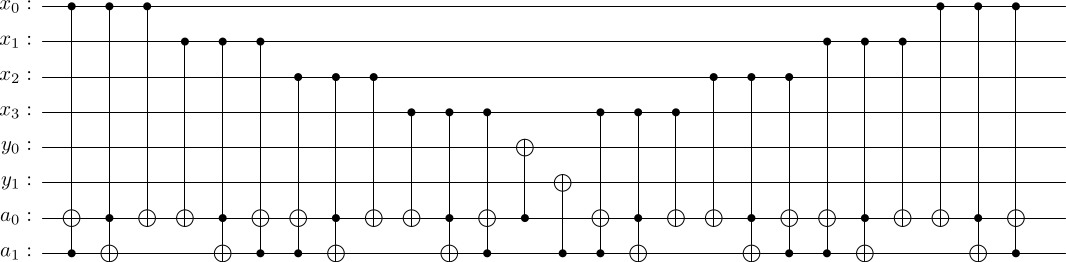

In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator


def build_mod3_oracle(visualize=False):
    # Definir registros cuánticos
    qr_x = QuantumRegister(4, 'x')  # Registro de entrada (4 qubits)
    qr_y = QuantumRegister(2, 'y')  # Registro de salida (2 qubits)
    qr_a = QuantumRegister(2, 'a')  # Registro auxiliar (2 qubits)
    qc = QuantumCircuit(qr_x, qr_y, qr_a, name='U_f')
    
    # ----Cálculo acumulativo sobre a
   
    # x0 (par): SUMA1 controlada
    _controlled_suma1(qc, qr_x[0], qr_a[1], qr_a[0])
    # x1 (impar): SUMA2 controlada
    _controlled_suma2(qc, qr_x[1], qr_a[1], qr_a[0])
    # x2 (par): SUMA1 controlada
    _controlled_suma1(qc, qr_x[2], qr_a[1], qr_a[0])
    # x3 (impar): SUMA2 controlada
    _controlled_suma2(qc, qr_x[3], qr_a[1], qr_a[0])
    
    # ----Copiar resultado a y
    qc.cx(qr_a[0], qr_y[0])
    qc.cx(qr_a[1], qr_y[1])
    
    # ----Limpieza (operación inversa)
    # x3 (inverso de SUMA2 = SUMA1 controlada)
    _controlled_suma1(qc, qr_x[3], qr_a[1], qr_a[0])
    # x2 (inverso de SUMA1 = SUMA2 controlada)
    _controlled_suma2(qc, qr_x[2], qr_a[1], qr_a[0])
    # x1 (inverso de SUMA2 = SUMA1 controlada)
    _controlled_suma1(qc, qr_x[1], qr_a[1], qr_a[0])
    # x0 (inverso de SUMA1 = SUMA2 controlada)
    _controlled_suma2(qc, qr_x[0], qr_a[1], qr_a[0])

    if(visualize is True):
        return qc.draw('latex'), qc
    return qc

# Operación SUMA1 controlada: +1 mod 3
def _controlled_suma1(qc, control, a1, a0):
    qc.ccx(control, a1, a0)
    qc.ccx(control, a0, a1)
    qc.cx(control, a0)

# Operación SUMA2 controlada: +2 mod 3
def _controlled_suma2(qc, control, a1, a0):
    qc.cx(control, a0)
    qc.ccx(control, a0, a1)
    qc.ccx(control, a1, a0)

build_mod3_oracle(True)[0]

### Simulación

Para verificar la correcta implementación, simulamos el oráculo en cada estado del dominio.

In [25]:
def test_oracle(input_value):
    # Convertir entrada a binario (4 bits)
    input_bin = format(input_value, '04b')[::-1]
    
    # Crear registros
    qr_x = QuantumRegister(4, 'x')
    qr_y = QuantumRegister(2, 'y')
    qr_a = QuantumRegister(2, 'a')
    cr = ClassicalRegister(2, 'result')
    qc = QuantumCircuit(qr_x, qr_y, qr_a, cr)
    
    # Inicializar entrada
    for i, bit in enumerate(input_bin):
        if bit == '1':
            qc.x(qr_x[i])
    
    # Aplicar oráculo
    mod3_oracle = build_mod3_oracle()
    qc.append(mod3_oracle, qr_x[:] + qr_y[:] + qr_a[:])
    
    # Medir resultado
    qc.measure(qr_y, cr)
    
    return qc

if __name__ == "__main__":
    test_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    simulator = AerSimulator()
    result_map = {'00': 0, '01': 1, '10': 2}
    
    for value in test_values:
        expected = value % 3
        qc = test_oracle(value)
        
        # Transpilar y simular
        compiled_circuit = transpile(qc, simulator)
        job = simulator.run(compiled_circuit, shots=1000)
        result = job.result()
        
        # Obtener resultados
        counts = result.get_counts()
        most_common = max(counts, key=counts.get)
        obtained = result_map[most_common]
        
        print(f"Input: {value:2d} \t Expected: {expected} \t Obtained: {obtained} \t Status: {'OK' if expected == obtained else 'ERROR'}")

Input:  0 	 Expected: 0 	 Obtained: 0 	 Status: OK
Input:  1 	 Expected: 1 	 Obtained: 1 	 Status: OK
Input:  2 	 Expected: 2 	 Obtained: 2 	 Status: OK
Input:  3 	 Expected: 0 	 Obtained: 0 	 Status: OK
Input:  4 	 Expected: 1 	 Obtained: 1 	 Status: OK
Input:  5 	 Expected: 2 	 Obtained: 2 	 Status: OK
Input:  6 	 Expected: 0 	 Obtained: 0 	 Status: OK
Input:  7 	 Expected: 1 	 Obtained: 1 	 Status: OK
Input:  8 	 Expected: 2 	 Obtained: 2 	 Status: OK
Input:  9 	 Expected: 0 	 Obtained: 0 	 Status: OK
Input: 10 	 Expected: 1 	 Obtained: 1 	 Status: OK
Input: 11 	 Expected: 2 	 Obtained: 2 	 Status: OK
Input: 12 	 Expected: 0 	 Obtained: 0 	 Status: OK
Input: 13 	 Expected: 1 	 Obtained: 1 	 Status: OK
Input: 14 	 Expected: 2 	 Obtained: 2 	 Status: OK
Input: 15 	 Expected: 0 	 Obtained: 0 	 Status: OK


## Búsqueda de Período

Circuito completo:


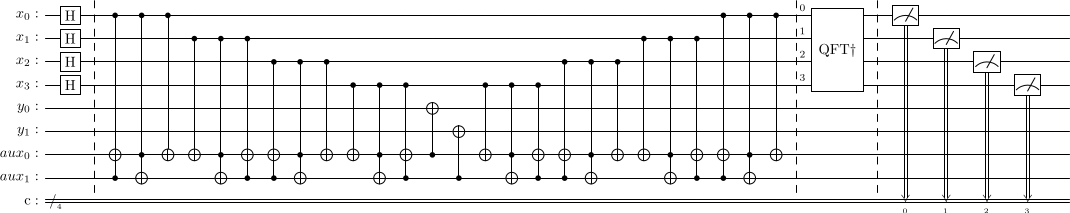


Ejecutando simulador (2000 shots)...


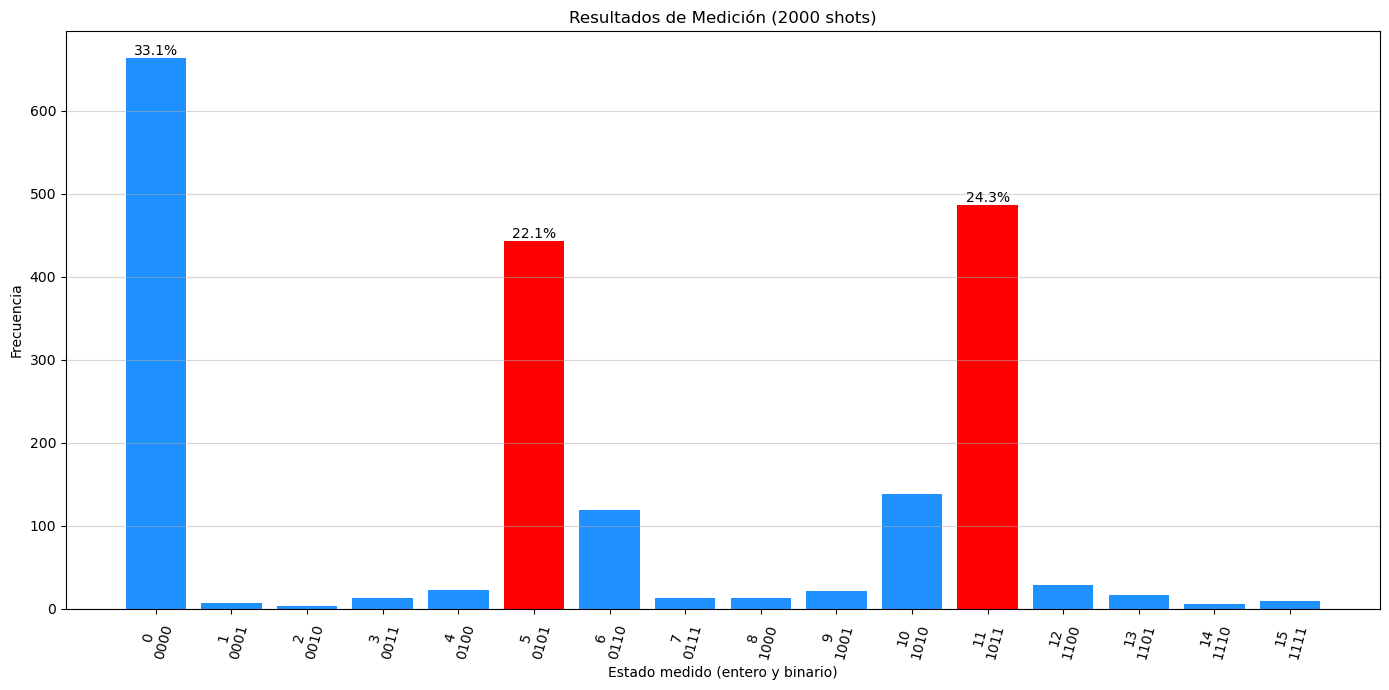

None


Análisis de resultados:
Estado más frecuente: 0000 (=0)
Fracción: 0 -> Período estimado r = 1
Valor esperado para r=3 (al ver histograma): estados 5 (0101) y 11 (1011)

Estados con probabilidad > 10%:
0000: 663 veces (33.15%) → Fracción: 0
1011: 486 veces (24.30%) → Fracción: 2/3
0101: 443 veces (22.15%) → Fracción: 1/3


In [76]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
from fractions import Fraction
import matplotlib.pyplot as plt

# Definición del oráculo U_f
def mod3_oracle(qc, control, aux, target):
    # SUMA1 para bits pares (k=0,2)
    def suma1(qc, ctrl, t0, t1):
        qc.ccx(ctrl, t1, t0)
        qc.ccx(ctrl, t0, t1)
        qc.cx(ctrl, t0)
    
    # SUMA2 para bits impares (k=1,3)
    def suma2(qc, ctrl, t0, t1):
        qc.cx(ctrl, t0)
        qc.ccx(ctrl, t0, t1)
        qc.ccx(ctrl, t1, t0)
    
    suma1(qc, control[0], aux[0], aux[1])  # k=0
    suma2(qc, control[1], aux[0], aux[1])  # k=1
    suma1(qc, control[2], aux[0], aux[1])  # k=2
    suma2(qc, control[3], aux[0], aux[1])  # k=3
    
    # Copiar registro auxiliar a registro de salida
    qc.cx(aux[0], target[0])
    qc.cx(aux[1], target[1])
    
    # Limpieza
    suma2(qc, control[3], aux[0], aux[1])  # k=3
    suma1(qc, control[2], aux[0], aux[1])  # k=2
    suma2(qc, control[1], aux[0], aux[1])  # k=1
    suma1(qc, control[0], aux[0], aux[1])  # k=0

# Parámetros del circuito
n = 4  # Qubits de entrada
N = 2**n
m = 2 # Qubits de salida
qr_x = QuantumRegister(n, 'x')
qr_y = QuantumRegister(m, 'y')
qr_a = QuantumRegister(m, 'aux')
cr = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qr_x, qr_y, qr_a, cr) 

# Superponer con Hadamard
qc.h(qr_x)
qc.barrier()

# Aplicar oráculo
mod3_oracle(qc, qr_x, qr_a, qr_y)
qc.barrier()

# QFT inversa sobre registro de entrada
qc.append(QFT(n, inverse=True, name=r'QFT\dagger'), qr_x)
qc.barrier()

# Medir
qc.measure(qr_x, cr)

# Visualizar circuito 
print("Circuito completo:")
display(qc.draw('latex', fold=-1, scale=0.7)) 

# Simular
shots = 2000
print(f"\nEjecutando simulador ({shots} shots)...")
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=shots).result()
counts = result.get_counts()

# ----Histograma

plt.figure(figsize=(14, 7))
sorted_keys = sorted(counts.keys(), key=lambda x: int(x, 2))
sorted_counts = [counts[k] for k in sorted_keys]
labels = [f"{int(s,2)}\n{s}" for s in sorted_keys]

total_shots = sum(counts.values())
probs = [c/total_shots*100 for c in sorted_counts]

# Resaltar estados esperados (5 y 11)
colors = ['red' if int(s,2) in [5, 11] else 'dodgerblue' for s in sorted_keys]
bars = plt.bar(labels, sorted_counts, color=colors)

# Añadir porcentajes
for bar, prob in zip(bars, probs):
    if prob > 10: 
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, 
                f'{prob:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=75, fontsize=10)
plt.xlabel('Estado medido (entero y binario)')
plt.ylabel('Frecuencia')
plt.title(f'Resultados de Medición ({shots} shots)')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
display(plt.show())

# Encontrar período mediante fracciones continuas
if counts:
    max_state = max(counts, key=counts.get) 
    s = int(max_state, 2)
    frac = Fraction(s, N)
    frac = frac.limit_denominator(5)  # Delimitamos máximo
    r = frac.denominator
    
    print(f"\nAnálisis de resultados:")
    print(f"Estado más frecuente: {max_state} (={s})")
    print(f"Fracción: {frac} -> Período estimado r = {r}")
    print(f"Valor esperado para r=3 (al ver histograma): estados 5 (0101) y 11 (1011)")
    
    # Calcular todos los estados significativos
    print("\nEstados con probabilidad > 10%:")
    for state, count in counts.items():
        prob = count / 2000
        if prob > 0.1:
            s_val = int(state, 2)
            frac_val = Fraction(s_val, N).limit_denominator(5)
            print(f"{state}: {count} veces ({prob:.2%}) → Fracción: {frac_val}")
else:
    print("No se obtuvieron resultados")

#### Proceso de Fracciones Continuas

Luego de aplicar la QFT inversa y realizar la medición del registro de entrada, se obtiene un valor entero $s \in \{0, \dots, N-1\}$, donde $N = 2^n$. Este resultado proviene de una distribución de probabilidad que presenta picos cercanos a múltiplos de $N/r$, donde $r$ es el período de la función.

La idea central del método es que, al observar uno de estos picos, podemos estimar la fracción $\frac{s}{N}$ y, mediante fracciones continuas, extraer una aproximación $\frac{k}{r}$, donde $k$ y $r$ son enteros pequeños. El denominador de la fracción irreducible nos proporciona una posible estimación del período $r$.

**Paso a paso del procedimiento:**

1. **Obtener el valor $s$ más frecuente**: se identifica el estado medido con mayor probabilidad.
2. **Construir la fracción $\frac{s}{N}$**: representa la frecuencia normalizada del estado dentro del dominio de la QFT.
3. **Aplicar fracciones continuas**: se utiliza el algoritmo de fracciones continuas para encontrar la mejor aproximación racional de $\frac{s}{N}$, es decir, encontrar enteros $k$ y $r$ tales que:

   $$
   \left| \frac{s}{N} - \frac{k}{r} \right| < \frac{1}{2r^2}
   $$

   Esta cota proviene del teorema de aproximación racional y garantiza que si tal fracción $\frac{k}{r}$ existe, es única en ese rango.
4. **Verificar $r$**: dado que $\frac{k}{r} \approx \frac{s}{N}$, tomamos $r$ como candidato al período. Se recomienda verificar si $f(x) = f(x + r)$ en varios valores para asegurar la validez.


* Se obtuvo el estado $s = 5$, con $N = 16$:

  $$
  \frac{5}{16} = 0.3125 \approx \frac{1}{3} \Rightarrow r = 3
  $$

* Otro pico significativo fue $s = 11$:

  $$
  \frac{11}{16} = 0.6875 \approx \frac{2}{3} \Rightarrow r = 3
  $$

Ambos valores sugieren fuertemente que el período subyacente es $r = 3$, coincidiendo con la definición de la función $f(x) = x \mod 3$.

Se utilizó `Fraction(s, N).limit_denominator(5)` para acotar la búsqueda de fracciones con denominadores $\leq 5$, lo cual es adecuado dado que el período real esperado está dentro de ese rango. 